# Regresión Multinomial

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import scipy.stats as stats
from math import exp, log
pd.set_option('display.max_columns',None)
pd.set_option('display.max_rows',None)
import warnings
warnings.filterwarnings('ignore')
#Carga de paquetería para ciencia de datos
from sklearn.datasets import make_classification
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
from sklearn.metrics import confusion_matrix

In [2]:
M = pd.read_csv("C:\\Users\\ricardo\\Desktop\\BanxicoTrabajoCasa_v3\\CursoCienciaDeDatos\\Clases\\RegresionLogistica\\EjemploRegresionMultinomial3D.csv",dtype='str',encoding = "ISO-8859-1")
M[["Y","X1","X2","X3"]] = M[["Y","X1","X2","X3"]].astype(float)
M.head()

,Y,X1,X2,X3
0,2.0,0.825929,0.936133,0.385233
1,1.0,0.023315,0.362509,0.900775
2,0.0,0.363650,0.405652,0.196377
3,1.0,0.911445,0.011728,0.516514
4,1.0,0.330563,0.141189,0.762634


In [3]:
RM = LogisticRegression(multi_class="multinomial",solver="lbfgs",C=10)
#lbfgs = Limited-memory Broyden–Fletcher–Goldfarb–Shanno Algorithm
#C inverso del parámetro de regularización (con norma L2)
RM.fit(M[["X1","X2","X3"]],M[["Y"]])
y_pred = RM.predict(M[["X1","X2","X3"]])

In [4]:
y_pred

array([2., 1., 0., 1., 1., 1., 1., 1., 2., 2., 1., 1., 1., 1., 1., 2., 2.,
       1., 1., 1., 2., 1., 1., 1., 0., 0., 1., 1., 2., 1., 1., 1., 0., 0.,
       1., 2., 2., 0., 0., 2., 1., 1., 1., 1., 1., 1., 1., 0., 2., 1., 1.,
       0., 1., 1., 1., 0., 1., 1., 1., 1., 1., 1., 0., 1., 1., 0., 1., 1.,
       0., 2., 1., 0., 1., 1., 1., 1., 1., 1., 1., 0., 2., 1., 1., 1., 0.,
       0., 2., 0., 1., 1., 1., 1., 1., 1., 0., 1., 1., 1., 1., 1.])

In [5]:
M["Y"].values

array([2., 1., 0., 1., 1., 1., 1., 1., 2., 2., 1., 1., 1., 1., 1., 2., 2.,
       0., 1., 1., 2., 1., 1., 1., 0., 0., 1., 1., 2., 1., 1., 1., 0., 0.,
       1., 2., 2., 0., 0., 2., 1., 1., 1., 1., 1., 1., 1., 0., 2., 1., 1.,
       0., 1., 1., 1., 0., 1., 0., 1., 1., 1., 1., 0., 2., 1., 0., 1., 2.,
       0., 2., 1., 0., 1., 1., 1., 1., 1., 1., 1., 0., 2., 1., 1., 1., 0.,
       0., 2., 0., 1., 1., 1., 0., 1., 1., 0., 1., 1., 1., 1., 1.])

In [6]:
MC = confusion_matrix(M["Y"].values, y_pred) #MC_{ij}  indica los valores que en realidad están en el grupo i y que
#fueron clasificados en el grupo j
MC

array([[19,  3,  0],
       [ 0, 62,  0],
       [ 0,  2, 14]], dtype=int64)

In [7]:
#Medida de referencia
metrica = (MC[0][0] + MC[1][1] + MC[2][2])/len(M["Y"].values)
metrica

0.95

# Gráfica de verificación de parámetro de regularización

In [8]:
vC = np.linspace(0,20,100)
vmetrica = []
for c in vC:
    RM = LogisticRegression(multi_class="multinomial",solver="lbfgs",C=c)
    RM.fit(M[["X1","X2","X3"]],M[["Y"]])
    y_pred = RM.predict(M[["X1","X2","X3"]])
    MC = confusion_matrix(M["Y"].values, y_pred)
    metrica = (MC[0][0] + MC[1][1] + MC[2][2])/len(M["Y"].values)
    vmetrica.extend([metrica])

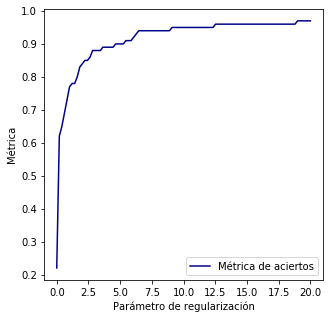

In [9]:
#Gráfica
fig = plt.figure(figsize=(5.,5.))
ax = fig.add_subplot(1,1,1)
plt.plot(vC, vmetrica, color="darkblue", linestyle= "-",label="Métrica de aciertos")
plt.xlabel('Parámetro de regularización')
plt.ylabel('Métrica')
plt.legend(loc='best',ncol=1)
plt.show()

# Ejercicio

In [10]:
#Un banco tienen la información de tres tipos de tarjetas de cédito otorgadas a sus clientes, con base en la edad, 
#el salario y los años de antigüedad en su último empleo.
#Con base en estos datos determinar el parámetro de regulación C que mejor ajuste al modelo en un rango de 0 a 30.
#¿Qué tarjeta se le debería otorgar a una persona de 50 años con un salario de 90,000 pesos mensuales y una antigüedad 
#de 25 años en su último empleo?

In [11]:
ME = pd.read_csv("C:\\Users\\ricardo\\Desktop\\BanxicoTrabajoCasa_v3\\CursoCienciaDeDatos\\Clases\\RegresionLogistica\\EjemploTarjetasBanco.csv",dtype='str',encoding = "ISO-8859-1")
#ME[["Y","Edad","Salario","Antiguedad"]] = ME[["Y","Edad","Salario","Antiguedad"]].astype(float)
ME[["Edad","Salario","Antiguedad"]] = ME[["Edad","Salario","Antiguedad"]].astype(float)
ME.head()

,Y,Edad,Salario,Antiguedad
0,Platino,46.0,55354.0,14.0
1,Platino,54.0,51978.0,28.0
2,Basica,33.0,26505.0,11.0
3,Basica,35.0,49778.0,4.0
4,Basica,59.0,5449.0,24.0


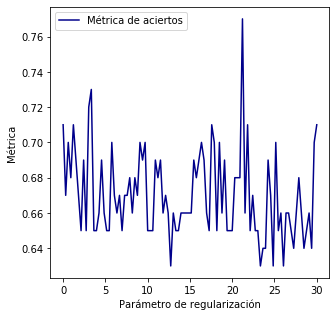

In [12]:
vC = np.linspace(0,30,100)
vmetrica = []
for c in vC:
    RM = LogisticRegression(multi_class="multinomial",solver="lbfgs",C=c)
    RM.fit(ME[["Edad","Salario","Antiguedad"]],ME[["Y"]])
    y_pred = RM.predict(ME[["Edad","Salario","Antiguedad"]])
    MC = confusion_matrix(ME[["Y"]].values, y_pred)
    metrica = (MC[0][0] + MC[1][1] + MC[2][2])/len(ME["Y"].values)
    vmetrica.extend([metrica])
#Gráfica
fig = plt.figure(figsize=(5.,5.))
ax = fig.add_subplot(1,1,1)
plt.plot(vC, vmetrica, color="darkblue", linestyle= "-",label="Métrica de aciertos")
plt.xlabel('Parámetro de regularización')
plt.ylabel('Métrica')
plt.legend(loc='best',ncol=1)
plt.show()

In [13]:
#Determinación del valor de C
posicion = vmetrica.index(max(vmetrica))
c = vC[posicion]
print("El valor que proporciona el mejor ajuste bajo la métrica indicada es ",c)

El valor que proporciona el mejor ajuste bajo la métrica indicada es  21.21212121212121


In [14]:
#Respuesta
d = {0:"Basica",1:"Oro",2:"Platino"}
RM = LogisticRegression(multi_class="multinomial",solver="lbfgs",C=c)
RM.fit(ME[["Edad","Salario","Antiguedad"]],ME[["Y"]])
#print("La tarjeta proporcionada es ",d[RM.predict([[50,90000,25]])[0]])
print("La tarjeta proporcionada es ",RM.predict([[50,90000,25]])[0])

La tarjeta proporcionada es  Platino
